In [ ]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset from Hugging Face 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Clean up the 'job_posted_date' column by converting it to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

# Analyze using pivot tables

Top 3 most famous jobs: ['Data Analyst', 'Data Engineer', 'Data Scientist']
Top 6 countries: ['United States', 'India', 'France', 'United Kingdom', 'Germany', 'Spain']


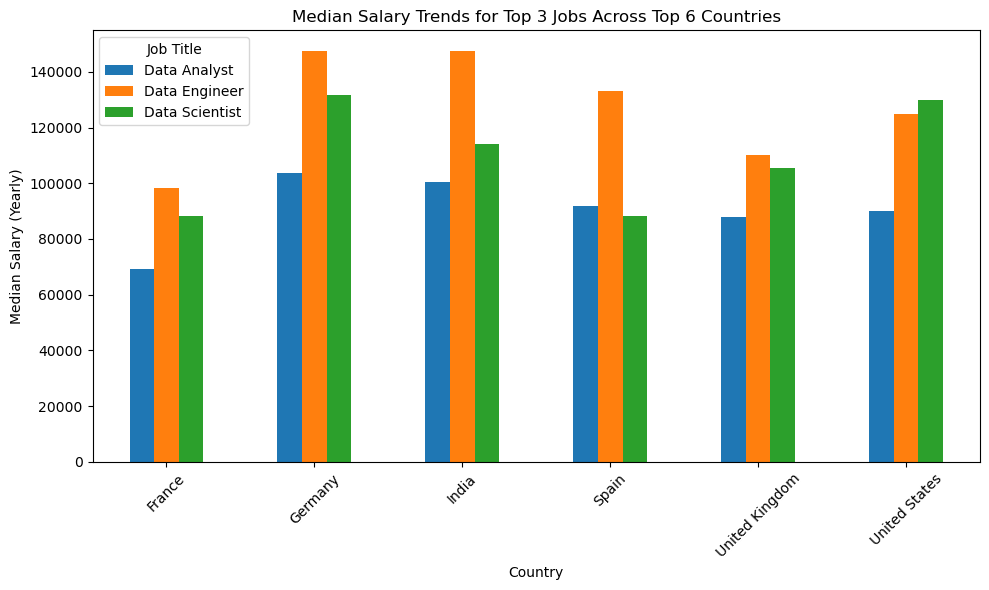

In [11]:
# Analyze the top 3 most famous jobs
top_jobs = df['job_title_short'].value_counts().head(3).index.tolist()
print("Top 3 most famous jobs:", top_jobs)

# Filter the dataset for the top 3 jobs
filtered_df = df[df['job_title_short'].isin(top_jobs)]

# Analyze the top 6 countries by job count
top_countries = filtered_df['job_country'].value_counts().head(6).index.tolist()
print("Top 6 countries:", top_countries)

# Filter the dataset for the top 6 countries
filtered_df = filtered_df[filtered_df['job_country'].isin(top_countries)]

# Create a pivot table to calculate the median salary for each job and country
median_salaries_pivot = filtered_df.pivot_table(
    index='job_country',
    columns='job_title_short',
    values='salary_year_avg',
    aggfunc='median'
)

# Plot the chart
median_salaries_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Median Salary Trends for Top 3 Jobs Across Top 6 Countries')
plt.xlabel('Country')
plt.ylabel('Median Salary (Yearly)')
plt.legend(title='Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
df["job_title_short"].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [7]:
df.groupby("job_title_short").size().sort_values(ascending=False)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
dtype: int64

In [9]:
df.pivot_table(index="job_country", columns="job_title_short", values="salary_year_avg", aggfunc="median")

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0
